# Attrition assignment - Statistical learning project

## Problem statement

Problem Statement A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employeesí projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

Columns
EmployeeIDEmployee number/id
EnvironmentSatisfactionWork Environment Satisfaction Level
JobSatisfactionJob Involvement Level Job Involvement Level Job Involvement Level
WorkLifeBalanceWork life balance level

## Step1 - Launching

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [53]:
dataset = pd.read_csv('/Users/sakshamwane/Desktop/LetsUpgrade-AI-ML/Day 7 - Statistical learning project/general_data.csv')

In [4]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


## Step2 - Data Treatment:


In [7]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
dataset = dataset.dropna()

In [9]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4404    False
4405    False
4406    False
4407    False
4408    False
Length: 4382, dtype: bool

In [10]:
dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


## Step3 - Univariate Analysis

In [11]:
dataset1 = dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 
                    'YearsWithCurrManager']].describe()
dataset1

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,65061.702419,2.693291,15.210634,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,47142.310175,2.497832,3.663007,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83790.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [12]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].median()
dataset1

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [13]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 
                  'YearsWithCurrManager']].mode()
dataset1

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,23420,1.0,11,10.0,2,5,0,2


In [14]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 
                  'YearsWithCurrManager']].var()
dataset1

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [15]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 
                  'YearsWithCurrManager']].skew()
dataset1

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

In [16]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 
                  'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()
dataset1

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

Inference from the analysis:
 - All the above variables show positive skewness; while Age & Mean_distance_from_home are leptokurtic and all other variables are platykurtic.
 -  The Mean_Monthly_Income’s IQR is at 54K suggesting company wide attrition across all income bands
 - Mean age forms a near normal distribution with 13 years of IQR

In [75]:
dataset1 = dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 
                  'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5e42ee7d0>,
      dtype=object)

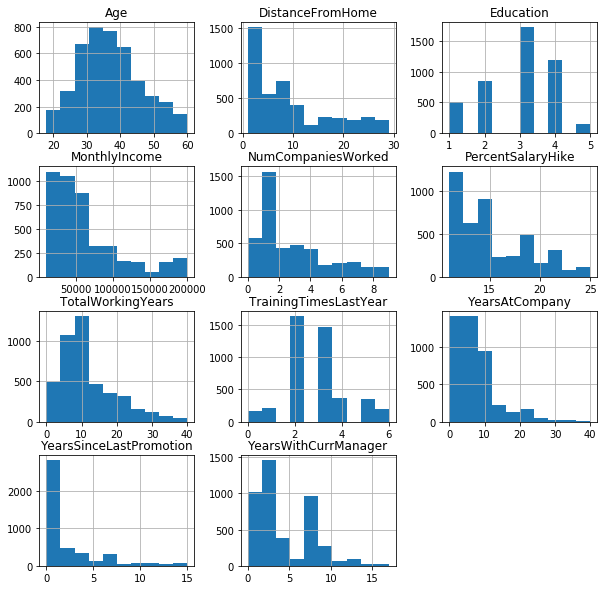

In [76]:
dataset1.hist(figsize=(10,10))

__Outliers__

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5f0598e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5f05c3590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5f368bd50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5f05c3fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5f05cb5d0>],
 'means': []}

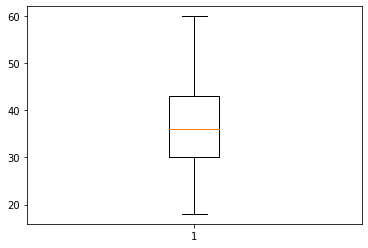

In [17]:
box_plot=dataset.Age
plt.boxplot(box_plot)

Age is normally ditributed without any outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5f157d1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5f1590990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5f15892d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5f0598b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5f1598910>],
 'means': []}

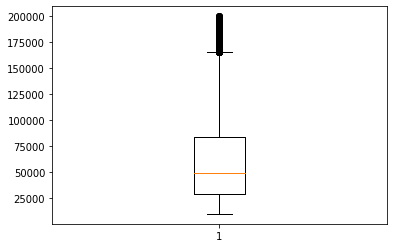

In [18]:
box_plot = dataset.MonthlyIncome
plt.boxplot(box_plot)

Monthly income is Right skewed with several outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5f3c58190>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5f3c58c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5f3c524d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5f3c616d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5f3c61bd0>],
 'means': []}

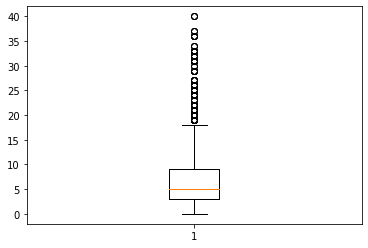

In [19]:
box_plot=dataset.YearsAtCompany
plt.boxplot(box_plot)

Years at company also right skewed with several outliers.

Attrition V/s Department

## Step4 - Visualisations

In [87]:
df_yes = pd.read_csv('/Users/sakshamwane/Desktop/LetsUpgrade-AI-ML/Day 7 - Statistical learning project/Attrition_yes.csv')

In [86]:
df_no = pd.read_csv('/Users/sakshamwane/Desktop/LetsUpgrade-AI-ML/Day 7 - Statistical learning project/Attrition_yes.csv')

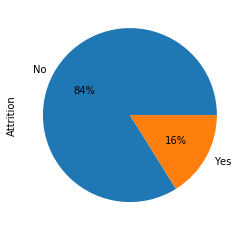

In [81]:
dataset['Attrition'].value_counts().plot(kind='pie', autopct=('%1.0f%%'))

## This pie chart clearly states that __16%__ of the employess leaves the company

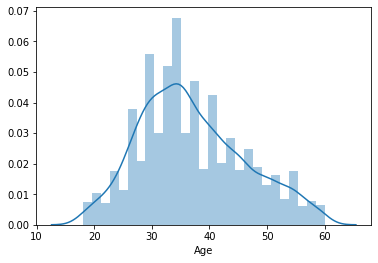

In [82]:
sns.distplot(dataset.Age)

This Dist plot shows the mean number of employees are around the age of 30-40

## Step5 - Statistical Tests(Mann-Whitney u)

__Attrition V/s Distance from home__

In [98]:
from scipy.stats import mannwhitneyu

In [99]:
stats, p=mannwhitneyu(df_yes.DistanceFromHome, df_no.DistanceFromHome)
print(stats,p)

248512.5 0.49997379971337447


As the P value of 0.0 is < 0.05, the H0 is rejected and Ha is accepted.

H0: There is no significant differences in the Distance From Home between attrition (Y) and attirition (N)

Ha: There is significant differences in the Distance From Home between attrition (Y) and attirition (N)

__Attrition V/s Income__


In [100]:
stats, p=mannwhitneyu(df_yes.MonthlyIncome, df_no.MonthlyIncome)
print(stats,p)

248512.5 0.4999739070995918


As the P < than 0.05, the H0 is rejected and ha is accepted.

H0: There is no significant differences in the income between attrition (Y) and attirition (N)

Ha: There is significant differences in the income between attrition (Y) and attirition (N)


__Attrition V/s Total working years__

In [101]:
stats, p=mannwhitneyu(df_yes.TotalWorkingYears, df_no.TotalWorkingYears)
print(stats,p)

248512.5 0.49997379959666965


As the P value < than 0.05, the H0 is rejected and ha is accepted.

H0: There is no significant differences in the Total Working Years between attrition (Y) and attirition (N)

Ha: There is significant differences in the Total Working Years between attrition (Y) and attirition (N)

__Attrition V/s Years at company__


In [102]:
stats, p=mannwhitneyu(df_yes.YearsAtCompany, df_no.YearsAtCompany)
print(stats,p)

248512.5 0.4999736449674139


As the P value < than 0.05, the H0 is rejected and ha is accepted.

H0: There is no significant differences in the Years At Company between attrition (Y) and attirition (N)

Ha: There is significant differences in the Years At Company between attrition (Y) and attirition (N)

__Attriton V/s Years with current manager__

In [103]:
stats, p=mannwhitneyu(df_yes.YearsWithCurrManager, df_no.YearsWithCurrManager)
print(stats,p)

248512.5 0.4999731133372633


As the P value  < than 0.05, the H0 is rejected and ha is accepted.

H0: There is no significant differences in the Years With Current Manager between attrition (Y) and attirition (N)

Ha: There is significant differences in the Years With Current Manager between attrition (Y) and attirition (N)


## Step 6 – Statistical Tests (Separate T Test)

In [104]:
from scipy.stats import ttest_ind

__Attriton V/s distance from home__

In [106]:
stats, p=ttest_ind(df_yes.DistanceFromHome, df_no.DistanceFromHome)
print(stats, p)

0.0 1.0


Here p value > 0.05, So null hypothesis is accepted and alternative hypothesis is rejected

H0: There is no significant differences in the Distance From Home between attrition (Y) and attirition (N)

Ha: There is significant differences in the Distance From Home between attrition (Y) and attirition (N)

__Attriton V/s Distance from home__

In [108]:
stats, p=ttest_ind(df_yes.MonthlyIncome, df_no.MonthlyIncome)
print(stats, p)

0.0 1.0


Here p value > 0.05, So null hypothesis is accepted and alternative hypothesis is rejected

H0: There is no significant differences in the Monthly income between attrition (Y) and attirition (N)

Ha: There is significant differences in the Monthly income between attrition (Y) and attirition (N)

__Attrition V/s Years with current manager__

In [109]:
stats, p=ttest_ind(df_yes.YearsWithCurrManager, df_no.YearsWithCurrManager)
print(stats, p)

0.0 1.0


Here p value > 0.05, So null hypothesis is accepted and alternative hypothesis is rejected

H0: There is no significant differences in the Years with current manager between attrition (Y) and attirition (N)

Ha: There is significant differences in the Years with current manager between attrition (Y) and attirition (N)

__Attrition V/s company__

In [110]:
stats, p=ttest_ind(df_yes.YearsAtCompany, df_no.YearsAtCompany)
print(stats, p)

0.0 1.0


Here p value > 0.05, So null hypothesis is accepted and alternative hypothesis is rejected

H0: There is no significant differences in the Years at company between attrition (Y) and attirition (N)

Ha: There is significant differences in the Years at company between attrition (Y) and attirition (N)

## Step 8 – Unsupervised Learning - Correlation Analysis

In [114]:
dataset3 = pd.read_csv('general_data.csv')

In [115]:
dataset3.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [134]:
from sklearn import preprocessing

In [135]:
LabelEncoder = preprocessing.LabelBinarizer()

In [136]:
dataset3['Attrition'] = LabelEncoder.fit_transform(dataset['Attrition'])

In [137]:
from scipy.stats import pearsonr

In [140]:
stats, p=pearsonr(dataset3.Attrition, dataset3.MonthlyIncome) 
print(stats, p)

-0.03117628169811501 0.03842748490600132


In [141]:
stats, p=pearsonr(dataset3.Attrition, dataset3.DistanceFromHome) 
print(stats, p)

-0.009730141010179666 0.5182860428050771


In [146]:
stats, p=pearsonr(dataset3.Attrition, dataset3.YearsAtCompany) 
print(stats, p)

-0.1343922139899772 3.1638831224877484e-19


In [147]:
stats, p=pearsonr(dataset3.Attrition, dataset3.YearsWithCurrManager) 
print(stats, p)

-0.15619931590162842 1.7339322652900218e-25


## The inference of the above analysis are as follows:

__Attrition & DistanceFromHome:__
As r = -0.009, there’s low negative correlation between Attrition and DistanceFromHome
As the P value of 0.518 is > 0.05, we are accepting H0 and hence there’s no significant correlation between Attrition & DistanceFromHome

__Attrition & MonthlyIncome:__
As r = -0.031, there’s low negative correlation between Attrition and MonthlyIncome
As the P value of 0.038 is < 0.05, we are accepting Ha and hence there’s significant correlation between Attrition & MonthlyIncome

__Attrition & TotalWorkingYears:__
As r = -0.17, there’s low negative correlation between Attrition and TotalWorkingYears
As the P value is < 0.05, we are accepting Ha and hence there’s significant correlation between Attrition & TotalWorkingYears

__Attrition & YearsAtCompany:__
As r = -0.1343, there’s low negative correlation between Attrition and YearsAtCompany
As the P value is < 0.05, we are accepting Ha and hence there’s significant correlation between Attrition & YearsAtCompany

__Attrition & YearsWithCurrManager:__
As r = -0.1561, there’s low negative correlation between Attrition and YearsWithCurrManager
As the P value is < 0.05, we are accepting Ha and hence there’s significant correlation between Attrition & YearsWithCurrManager